In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1758]:
data=pd.read_csv('ebayseven.csv')
data=data.drop('Unnamed: 0', axis=1)
data.head()

,itemid,title,subtitle,catid,catname,gurl,url,autopay,postcode,location,...,spec1,spec2,spec3,stars,review0,review1,review2,review3,review4,response
0,253547842551,Dell Latitude E6420 Intel® Core™ i5-2520M 2nd ...,Intel® HD 3000 Graphics - NEW Battery - Window...,177,PC Laptops & Netbooks,http://thumbs4.ebaystatic.com/m/mRZm2tYvLXnbpj...,http://www.ebay.com/itm/Dell-Latitude-E6420-In...,False,91506,"Burbank,CA,USA",...,More than 90% sold,Last item available,Located in United States,NaN,NaN,NaN,NaN,NaN,NaN,90
1,231517128643,Build your Blue Panasonic Toughbook CF-30 Full...,1 Year Warranty • DVD/CD-RW Combo • Waterproof...,177,PC Laptops & Netbooks,http://thumbs4.ebaystatic.com/pict/23151712864...,http://www.ebay.com/itm/Build-your-Blue-Panaso...,True,M3A2G3,Canada,...,100% buyer satisfaction,408 sold,More than 59% sold,NaN,NaN,NaN,NaN,NaN,NaN,59
2,382243663909,"Acer Aspire 15.6"" Laptop Intel Celeron 500GB 4...",NaN,177,PC Laptops & Netbooks,http://thumbs2.ebaystatic.com/pict/38224366390...,http://www.ebay.com/itm/Acer-Aspire-15-6-Lapto...,True,60527,"Willowbrook,IL,USA",...,Free delivery in 3 days,Limited quantity remaining,More than 63% sold,NaN,NaN,NaN,NaN,NaN,NaN,63
3,291794787352,Acer V5 Nitro Ed Intel i7@ 3.5Ghz 16Gb 1Tb Win...,NaN,177,PC Laptops & Netbooks,http://thumbs1.ebaystatic.com/m/mpLmnq3elhtjGQ...,http://www.ebay.com/itm/Acer-V5-Nitro-Ed-Intel...,True,78209,"San Antonio,TX,USA",...,100% buyer satisfaction,45 sold,More than 97% sold,NaN,NaN,NaN,NaN,NaN,NaN,97
4,222676810100,DELL LATITUDE Laptop Computer PC CORE I5 Windo...,NaN,177,PC Laptops & Netbooks,http://thumbs1.ebaystatic.com/pict/22267681010...,http://www.ebay.com/itm/DELL-LATITUDE-Laptop-C...,True,75074,"Plano,TX,USA",...,261 sold,More than 92% sold,Located in United States,NaN,NaN,NaN,NaN,NaN,NaN,92


# Missing Values 

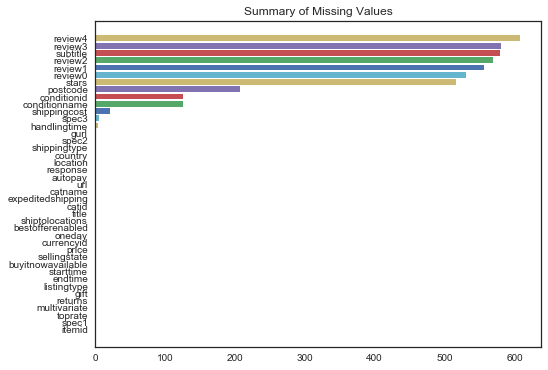

In [1869]:
missing=data.apply(lambda x: sum(x.isnull()), axis=0).sort_values()
fig=plt.figure(figsize=(8,6))
for i in range(missing.shape[0]):
    plt.barh(missing.index[i], missing.values[i])
plt.title('Summary of Missing Values')
plt.savefig('missing.jpg')

In [7]:
# There are 24 categorical variables
data.select_dtypes('object').shape

(708, 24)

In [8]:
data.select_dtypes('object').columns

Index(['title', 'subtitle', 'catname', 'gurl', 'url', 'postcode', 'location',
       'country', 'shippingtype', 'shiptolocations', 'currencyid',
       'sellingstate', 'starttime', 'endtime', 'listingtype', 'conditionname',
       'spec1', 'spec2', 'spec3', 'review0', 'review1', 'review2', 'review3',
       'review4'],
      dtype='object')

In [9]:
import re
import itertools

for i in ['spec1' , 'spec2', 'spec3']:
    globals()[i]=[]
    for index, row in data.iterrows():
        if re.search('More than', str(row[i])) is None:
            row[i+'1']=0
        else:
            row[i+'1']=''.join(re.findall('\d', row.spec1))
            
        globals()[i].append(row[i+'1'])


In [10]:
dd=pd.DataFrame(np.column_stack([spec1, spec2, spec3]), columns=['s1', 's2', 's3'])
dd['response']=pd.to_numeric(dd.s1)+pd.to_numeric(dd.s2)+pd.to_numeric(dd.s3)
dd[dd.response!=0.0].count()

s1          708
s2          708
s3          708
response    638
dtype: int64

In [214]:
data1=data.join(dd.response)
df=data1[(data1.response!=0.0) & (data1.response.isnull()==False)]
df=df.drop('index', axis=1)

In [215]:
df.select_dtypes('object').columns

Index(['title', 'subtitle', 'catname', 'gurl', 'url', 'postcode', 'location',
       'country', 'shippingtype', 'shiptolocations', 'currencyid',
       'sellingstate', 'starttime', 'endtime', 'listingtype', 'conditionname',
       'spec1', 'spec2', 'spec3', 'review0', 'review1', 'review2', 'review3',
       'review4'],
      dtype='object')

# Exploratory Data Analysis of Variables

# Categorical names

In [14]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.offline.init_notebook_mode(connected=True)

In [1870]:
fig = {
  "data": [
    {
      "values": list(df6.pcatname.value_counts().values),
      "labels": list(df6.pcatname.value_counts().index),
      "domain": {"x": [0, .48]},
      "name": "Categories",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Summary of Categories",
        "annotations": [
            {
                "font": {
                    "size": 10
                },
                "showarrow": False,
                "text": "Distribution",
                "x": 0.20,
                "y": 0.5
            }]
    }
}
py.iplot(fig, filename='donut')

# AutoPay

If true, the seller requires immediate payment for the item. If false (or not specified), immediate payment is not requested. Buyers must have a PayPal account to purchase items that require immediate payment. 

A seller can choose to require immediate payment for Fixed Price and Buy It Now listings, including eBay Stores Inventory listings. If a Buy It Now item ends as an auction (that is, if the Buy It Now option is removed due to bids being placed on the listing), the immediate payment requirement does not apply. 

Categories that require immediate payment are 'Athletic', 'Case Mods, Stickers & Decals', 'Jumpsuits & Rompers', 'Boots', 'CDs', 'Casual', 'PC Laptops & Netbooks', 'Electronic Keyboards'

Other stuff such as 'Developmental Baby Toys', 'Decals, Stickers & Vinyl Art' don't require autopayment


In [23]:
df.autopay.value_counts()

True     408
False    300
Name: autopay, dtype: int64

In [24]:
df.autopay=df.autopay.map({False:0, True:1})

# Location

In [28]:
df.country.value_counts()

US    633
CN     64
HK      9
TH      1
CA      1
Name: country, dtype: int64

In [70]:
from uszipcode import ZipcodeSearchEngine
search=ZipcodeSearchEngine()
zipcode=search.by_zipcode(95131)
print(zipcode.Latitude)
print(zipcode.Longitude)

37.3902956
-121.8961047


In [77]:
locs=df[df.country=='US'][['postcode', 'location', 'country']]
locs2=locs[locs.postcode.notnull()]
lat=[]
lon=[]
for index, row in locs2.iterrows():
    try:
        lat.append(search.by_zipcode(int(row.postcode)).Latitude)
        lon.append(search.by_zipcode(int(row.postcode)).Longitude)
    except ValueError:
        lat.append(search.by_zipcode(int(float(row.postcode))).Latitude)
        lon.append(search.by_zipcode(int(float(row.postcode))).Longitude)

In [1761]:
import folium
geo=pd.DataFrame(np.column_stack([lat, lon]), columns=['lat', 'lon'])
geo=geo.dropna(axis=0)
m=folium.Map(location=[39.7842111, -98.6160674], zoom_start=3)
for i, row in geo.iterrows():
    folium.CircleMarker([row.lat, row.lon],
                        radius=2,
                        color='red',
                        #fill_color=row['color'],
                       ).add_to(m)
m

# Shipping

The shipping method that was used for determining the cost of shipping. For example: flat rate, calculated, or free. The seller specifies the available shipping services when they list the item.
shippingType values:<br>
Calculated<br>
The calculated shipping model: The posted cost of shipping is based on the buyer-selected shipping service, chosen by the buyer from the different shipping services offered by the seller. The shipping costs are calculated by eBay and the shipping carrier, based on the buyer's address. Any packaging and handling costs established by the seller are automatically rolled into the total.<br>
CalculatedDomesticFlatInternational<br>
The seller specified one or more calculated domestic shipping services and one or more flat international shipping services.
Flat<br>
The flat-rate shipping model: The seller establishes the cost of shipping and any shipping insurance, regardless of what any buyer-selected shipping service might charge the seller.<br>
FlatDomesticCalculatedInternational<br>
The seller specified one or more flat domestic shipping services and one or more calculated international shipping services.<br>
Free<br>
Free is used when the seller has declared that shipping is free for the buyer.<br>
FreePickup<br>
No shipping available, the buyer must pick up the item from the seller.<br>
Freight<br>
The freight shipping model: the cost of shipping is determined by a third party, FreightQuote.com, based on the buyer's address (postal code).<br>
FreightFlat<br>
The flat rate shipping model: the seller establishes the cost of freight shipping and freight insurance, regardless of what any buyer-selected shipping service might charge the seller.<br>
NotSpecified<br>
The seller did not specify the shipping type.<br>

In [106]:
df.shippingtype.value_counts(normalize=True)

Free                                   0.772599
Flat                                   0.124294
FlatDomesticCalculatedInternational    0.060734
Calculated                             0.031073
FreePickup                             0.008475
CalculatedDomesticFlatInternational    0.002825
Name: shippingtype, dtype: float64

In [237]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq

calculated=df[df.shippingcost.isnull()].url.reset_index()
cost=[]
for i, r in calculated.iterrows():
    my_url=r.url
    uClient=uReq(my_url)
    page_html=uClient.read()
    uClient.close()
    page_soup=soup(page_html, 'html.parser')
    page_soup
    ship_containers=page_soup.findAll('span', {'id':"fshippingCost"})
    try:
        cost.append(float(ship_containers[0].text.strip('\n').strip('$')))
    except IndexError:
        cost.append(None)

In [244]:
cst=pd.DataFrame({'cost':cost})
calculation=calculated.join(cst)
calculation 

,index,url,cost
0,3,http://www.ebay.com/itm/Acer-V5-Nitro-Ed-Intel...,16.65
1,12,http://www.ebay.com/itm/Samsung-XE303C12-11-6-...,NaN
2,23,http://www.ebay.com/itm/MARATHON-1-HP-1800-RPM...,NaN
3,124,http://www.ebay.com/itm/Fisher-Price-Laugh-and...,4.34
4,232,http://www.ebay.com/itm/English-Bone-China-ROS...,NaN
5,242,http://www.ebay.com/itm/Waterford-Kylemore-Cla...,NaN
6,273,http://www.ebay.com/itm/Gerber-Waterproof-Plas...,2.42
7,313,http://www.ebay.com/itm/Doll-SHOE-LACES-String...,3.50
8,319,http://www.ebay.com/itm/Barbie-Fashionistas-Po...,3.50
9,375,http://www.ebay.com/itm/12-Black-Barn-Star-5-P...,4.10


In [254]:
for i in range(calculation.shape[0]):
    ind=calculation['index'][i]
    df.shippingcost[ind]=calculation['cost'][i]

C:\Users\pengq\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [281]:
calmean=df.groupby('shippingtype').mean().shippingcost[0]
df.shippingcost=df.shippingcost.fillna(calmean)

Shiptoplcations: all the values is worldwide there the whole column is deleted

In [287]:
df.shiptolocations.value_counts()

Worldwide    708
Name: shiptolocations, dtype: int64

In [288]:
df=df.drop('shiptolocations', axis=1)

Expeditedshipping: [Categorical]<br>
True and False

In [294]:
df.expeditedshipping=df.expeditedshipping.map({False:0, True:1})

OneDayShippingAvailable: [Categorical]<br>
True and False

In [300]:
df.oneday.value_counts(dropna=False)

False    646
True      62
Name: oneday, dtype: int64

In [301]:
df.oneday=df.oneday.map({False:0, True:1})

HandlingTime: [Numerical]

C:\Users\pengq\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



Median of HandlingTime: 1.0
Mean of HandlingTime: 1.6257062146892656


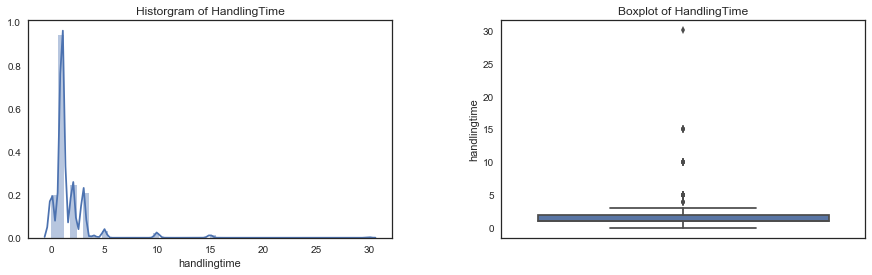

In [1737]:
fig, (ax1, ax2)=plt.subplots(nrows=1, ncols=2, figsize=(15,4))
plt.subplots_adjust(wspace=0.3)
sns.distplot(df.handlingtime.dropna(), ax=ax1).set_title('Historgram of HandlingTime')
sns.boxplot(df.handlingtime, orient='v', ax=ax2).set_title('Boxplot of HandlingTime')
print('Median of HandlingTime:',df.handlingtime.median())
print('Mean of HandlingTime:',df.handlingtime.mean())
plt.savefig('handlingtime.jpg')

In [357]:
df.handlingtime=df.handlingtime.fillna(df.handlingtime.median())

In [366]:
# CurrencyId: all the prices have been transformed to USD therefore delete the whole columns
df=df.drop('currencyid',axis=1)

# Price

C:\Users\pengq\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



Median of Price: 13.09
Mean of Price: 35.57137005649744


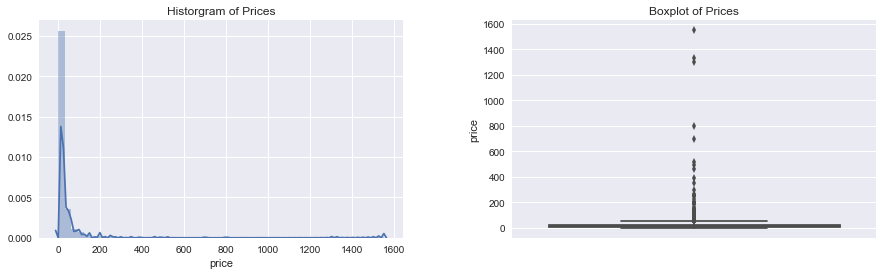

In [374]:
fig, (ax1, ax2)=plt.subplots(nrows=1, ncols=2, figsize=(15,4))
plt.subplots_adjust(wspace=0.3)
sns.distplot(df.price.dropna(), ax=ax1).set_title('Historgram of Prices')
sns.boxplot(df.price, orient='v', ax=ax2).set_title('Boxplot of Prices')
print('Median of Price:',df.price.median())
print('Mean of Price:',df.price.mean())

# Sellingstate: All are active

In [377]:
df.sellingstate.value_counts(dropna=False)

Active    708
Name: sellingstate, dtype: int64

# Bestofferenbaled: [Categorical]
True or False 

In [381]:
df.bestofferenabled.value_counts(dropna=False)

False    648
True      60
Name: bestofferenabled, dtype: int64

In [382]:
df.bestofferenabled=df.bestofferenabled.map({False:0, True:1})

# Buytitnowavailable: [Categorical]
True or False but all are False 

In [386]:
df.buyitnowavailable.value_counts(dropna=False)

False    708
Name: buyitnowavailable, dtype: int64

In [387]:
df=df.drop('buyitnowavailable', axis=1)

# Date Variable

In [402]:
df.starttime=pd.to_datetime(df.starttime)

In [463]:
import datetime
today = pd.to_datetime(datetime.datetime.now())
df['startdays']=[(today-i).days for i in df.starttime]

In [471]:
df.endtime=pd.to_datetime(df.endtime)
df['enddays']=[(i-today).days for i in df.endtime]

C:\Users\pengq\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



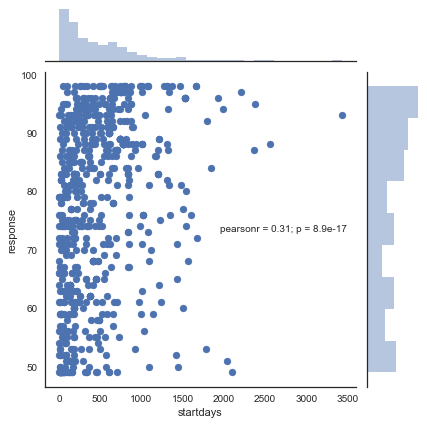

In [1739]:
sns.jointplot(df.startdays, df.response, kind='scatter')

# ListingType: [Categorical]

In [504]:
df.listingtype.value_counts()

FixedPrice        373
StoreInventory    335
Name: listingtype, dtype: int64

# Gift: [Categorical]

In [508]:
df.gift.value_counts()

False    708
Name: gift, dtype: int64

In [509]:
df=df.drop('gift', axis=1)

# Returns: [Categorical]
True or False

In [512]:
df.returns.value_counts()

True     603
False    105
Name: returns, dtype: int64

In [515]:
df.returns=df.returns.map({False:0, True:1})

# Conditionid: [Numerical]
Drop them all

In [530]:
df=df.drop('conditionid', axis=1)

# ConditionName: [Ordinal]

In [529]:
df.conditionname.value_counts()

New                         331
Brand New                    96
New with tags                60
New with box                 24
New other (see details)      20
Used                         12
New without tags             10
Seller refurbished            8
New without box               6
Good                          4
Like New                      3
Manufacturer refurbished      3
Acceptable                    2
Very Good                     2
Remanufactured                1
Name: conditionname, dtype: int64

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



Text(0.5,1,'Barplot of ConditionName VS Mean of SalePrice')

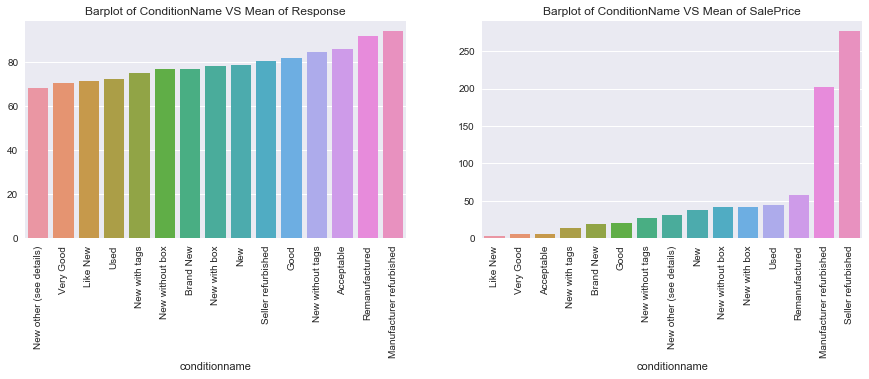

In [588]:
# the one that was refurbished are sold with the highest mean price 
# but new stuff barely have a saying in the big picture 
fig, (ax1, ax2)=plt.subplots(nrows=1, ncols=2, figsize=(15,4))
a=sns.barplot(df.groupby('conditionname').mean().response.sort_values().index, df.groupby('conditionname').mean().response.sort_values().values, ax=ax1)
a.set_title('Barplot of ConditionName VS Mean of Response')
for item in a.get_xticklabels():
    item.set_rotation(90)
b=sns.barplot(df.groupby('conditionname').mean().price.sort_values().index, df.groupby('conditionname').mean().price.sort_values().values, ax=ax2)
plt.xticks(rotation=90)
plt.title('Barplot of ConditionName VS Mean of SalePrice')

In [1775]:
df.groupby('conditionname').mean().response

conditionname
0.0    73.882353
1.0    75.025000
2.0    77.807018
3.0    84.916667
Name: response, dtype: float64

In [1773]:
sns.barplot(df.groupby('conditionname').mean().response.sort_values().index, df.groupby('conditionname').mean().response.sort_values().values, ax=ax1)
plt.show()

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



In [589]:
m={'Used':0, 'Like New':0, 'Acceptable':0, 'Good':1, 'New other (see details)':1, 'New without box':1, 
   'New without tags':1, 'Very Good':2, 'Brand New':2, 'New':2, 'New with box':2, 'New with tags':2,
  'Remanufactured':3, 'Seller refurbished':3, 'Manufacturer refurbished':3}

In [590]:
print(set(dep[dep.conditionid==1000.0].conditionname))
print(set(dep[dep.conditionid==1500.0].conditionname))
print(set(dep[dep.conditionid==3000.0].conditionname))
print(set(dep[dep.conditionid==2500.0].conditionname))
print(set(dep[dep.conditionid==5000.0].conditionname))
print(set(dep[dep.conditionid==2750.0].conditionname))
print(set(dep[dep.conditionid==2000.0].conditionname))
print(set(dep[dep.conditionid==6000.0].conditionname))
print(set(dep[dep.conditionid==4000.0].conditionname))

{'New with tags', 'New', 'Brand New', 'New with box'}
{'New without tags', 'New without box', 'New other (see details)'}
{'Used'}
{'Seller refurbished', 'Remanufactured'}
{'Good'}
{'Like New'}
{'Manufacturer refurbished'}
{'Acceptable'}
{'Very Good'}


In [591]:
df.conditionname=df.conditionname.map(m)

# Multivariate(IsMultivariationListing): [Categorical]
Returns true if the item is a multi-variation listing. 

In [594]:
df.multivariate.value_counts()

False    365
True     343
Name: multivariate, dtype: int64

In [595]:
df.multivariate=df.multivariate.map({False:0, True:1})

# Toprate: [Categorical]
True or False

In [602]:
df.toprate.value_counts()

0    457
1    251
Name: toprate, dtype: int64

In [600]:
df.toprate=df.toprate.map({False:0, True:1})

# Spec1-3: used to derive Response

In [603]:
df=df.drop(['spec1', 'spec2', 'spec3'], axis=1)

In [614]:
df.stars.isnull().sum()

517

In [618]:
dep.stars=dep.stars.fillna('None')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



Text(0.5,1,'Barplot of Stars VS Response Variable')

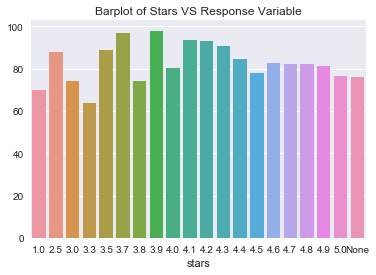

In [621]:
sns.barplot(dep.groupby('stars').mean().response.index, dep.groupby('stars').mean().response.values)
plt.title('Barplot of Stars VS Response Variable')

In [635]:
st=pd.DataFrame(np.column_stack([dep.groupby('stars').mean().response.index, dep.groupby('stars').mean().response.values]),
               columns=['star','response'])

In [664]:
starmean=round(st[(st.response>=70)&(st.response<80)].star[:-1].mean(),1)

In [679]:
df.stars=df.stars.fillna(starmean)

# Image Data

In [699]:
from collections import defaultdict
from scipy.stats import itemfreq
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage import feature
from PIL import Image as IMG
import numpy as np
import pandas as pd 
import operator
import cv2
import os 

from IPython.core.display import HTML 
from IPython.display import Image


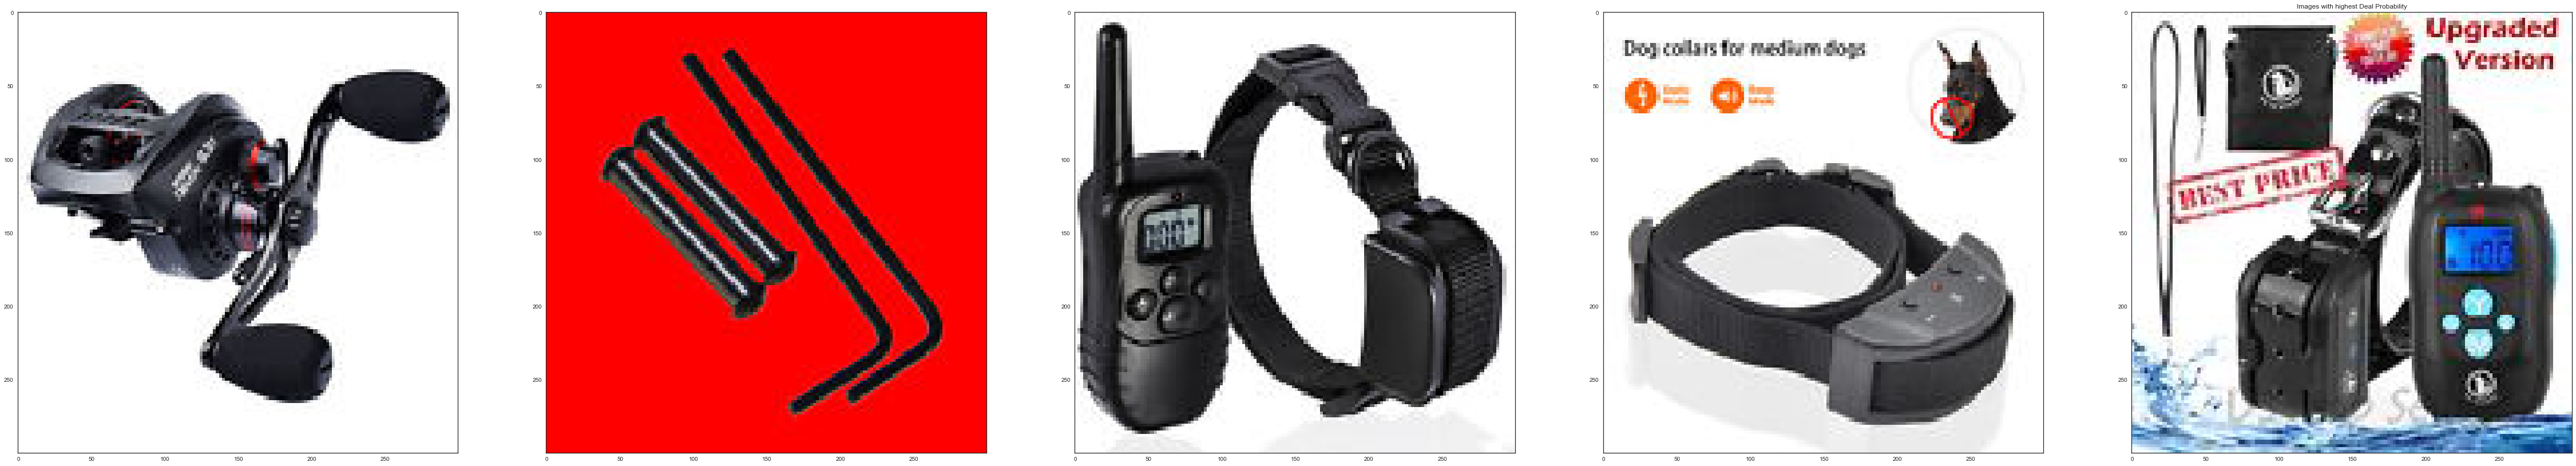

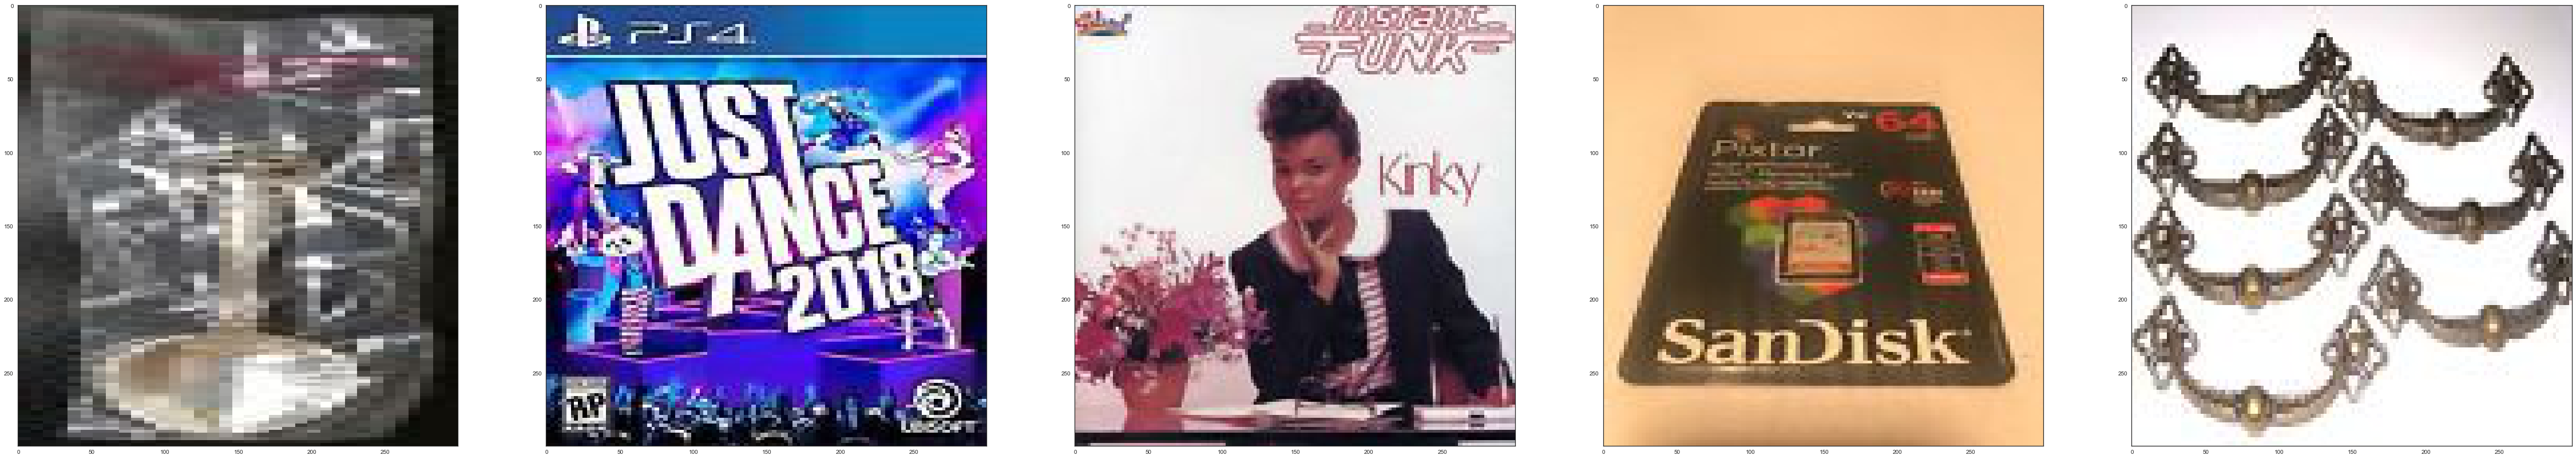

In [1872]:
from PIL import Image
import requests
from io import BytesIO
import cv2

images1=df[['gurl', 'response']].sort_values(by='response', ascending=False).gurl
images1=images.reset_index()
images2=df[['gurl', 'response']].sort_values(by='response', ascending=True).gurl
images2=images2.reset_index()

sns.set_style('white')
f, ax = plt.subplots(1,5)
plt.title('Images with highest Deal Probability')
f.set_size_inches(80, 40)
for i in range(5):
    response = requests.get(images1.gurl[i])
    path=BytesIO(response.content)
    ax[i].imshow(Image.open(path).resize((300, 300)))
plt.show()

f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
    response = requests.get(images2.gurl[i])
    path=BytesIO(response.content)
    ax[i].imshow(Image.open(path).resize((300, 300)))
plt.show()

# Brightness of the images 

In [826]:
def bright(img, flag):
    #path = images_path + img 
    #im = IMG.open(path) #.convert("RGB")
    
    # cut the images into two halves as complete average may give bias results
    size = img.size
    halves = (size[0]/2, size[1]/2)
    im1 = img.crop((0, 0, size[0], halves[1]))
    im2 = img.crop((0, halves[1], size[0], size[1]))

    try:
        light_percent1, dark_percent1 = color_analysis(im1)
        light_percent2, dark_percent2 = color_analysis(im2)
    except Exception as e:
        return None

    light_percent = (light_percent1 + light_percent2)/2 
    dark_percent = (dark_percent1 + dark_percent2)/2 
    
    if flag == 'black':
        return dark_percent
    elif flag == 'white':
        return light_percent
    else:
        return None

In [870]:
brightness=[]
for i in range(df.shape[0]):
    try:
        response = requests.get(df.gurl[i])
        path=BytesIO(response.content)
        img=Image.open(path)
        brightness.append(bright(img, 'white'))
    except:
        brightness.append(None)

# Edges of Image

In [882]:
def edge(img):
    im_array = np.asarray(img.convert(mode='L'))
    edges_sigma1 = feature.canny(im_array, sigma=3)
    apw = (float(np.sum(edges_sigma1)) / (img.size[0]*img.size[1]))
    return apw*100

In [883]:
edges=[]
for i in range(df.shape[0]):
    try:
        response = requests.get(df.gurl[i])
        path=BytesIO(response.content)
        img=Image.open(path)
        edges.append(edge(img))
    except:
        edges.append(None)

# Dominant Colors

In [894]:
def dominant(img):
    arr = np.float32(img)
    pixels = arr.reshape((-1, 3))

    n_colors = 5
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
    flags = cv2.KMEANS_RANDOM_CENTERS
    _, labels, centroids = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)

    palette = np.uint8(centroids)
    quantized = palette[labels.flatten()]
    quantized = quantized.reshape(img.shape)

    dominant_color = palette[np.argmax(itemfreq(labels)[:, -1])]
    return dominant_color

#features['dominant_color'] = features['image'].apply(get_dominant_color)
#features.head(10)

In [895]:
dominantcolor=[]
for i in range(df.shape[0]):
    try:
        resp = urllib.request.urlopen(df.gurl[i]) # only for python 3 
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        dominantcolor.append(dominant_color(image))
    except:
        dominantcolor.append(None)

# Image Size

In [926]:
import io
imagesize=[]
imagewidth=[]
imageheight=[]
for i in range(df.shape[0]):
    try:
        resp=urllib.request.urlopen(df.gurl[i]).read()
        imagesize.append(len(resp))
    except:
        imagesize.append(None)        
    try:
        resp=urllib.request.urlopen(df.gurl[i]).read()
        imagewidth.append(Image.open(BytesIO(resp)).size[0])
    except:
        imagewidth.append(None)
    try:
        resp=urllib.request.urlopen(df.gurl[i]).read()
        imageheight.append(Image.open(BytesIO(resp)).size[1])
    except:
        imageheight.append(None)

# Image Blurness

In [936]:
def blurr(image):
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    #image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = cv2.Laplacian(image, cv2.CV_64F).var()
    return fm

In [941]:
blurrness=[]
for i in range(df.shape[0]):
    try:
        resp = urllib.request.urlopen(df.gurl[i]) # only for python 3 
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        blurrness.append(blurr(image))
    except:
        blurrness.append(None)

In [980]:
imgdata['dominant_red'] = imgdata['dominantcolor'].apply(lambda x: x[0][0] / 255
imgdata['dominant_green'] = imgdata['dominantcolor'].apply(lambda x: x[0][1]) / 255
imgdata['dominant_blue'] = imgdata['dominantcolor'].apply(lambda x: x[0][2]) / 255

IndexError: invalid index to scalar variable.

In [990]:
dominantred=[]
dominantgreen=[]
dominantblue=[]
for i in dominantcolor:
    try:
        dominantred.append(i[0]/255)
    except:
        dominantred.append(None)
    try:
        dominantgreen.append(i[1]/255)
    except:
        dominantgreen.append(None)
    try:
        dominantblue.append(i[2]/255)
    except:
        dominantblue.append(None)

In [998]:
imgdata=pd.DataFrame(np.column_stack([brightness, edges, dominantred, dominantgreen, dominantblue,imagesize, imagewidth, imageheight, blurrness]),
                    columns=['brightness', 'edges', 'dominantred', 'dominantgreen', 'dominantblue','imagesize','imagewidth','imageheight','blurrness'])

In [1052]:
imgdata.to_csv('imgdata708.csv')

In [1002]:
imgdata.apply(lambda x: sum(x.isnull()), axis=0)

brightness       12
edges             1
dominantred       5
dominantgreen     5
dominantblue      5
imagesize         1
imagewidth        1
imageheight       1
blurrness         5
dtype: int64

In [1049]:
# Turn all the data into numeric values
for i in imgdata.columns:
    imgdata[i]=pd.to_numeric(imgdata[i])

In [1053]:
imgdata[imgdata.brightness.isnull()]

,brightness,edges,dominantred,dominantgreen,dominantblue,imagesize,imagewidth,imageheight,blurrness
111,NaN,7.602041,NaN,NaN,NaN,14065.0,140.0,140.0,NaN
121,NaN,5.328467,NaN,NaN,NaN,15460.0,140.0,137.0,NaN
144,NaN,5.683673,0.062745,0.062745,0.062745,5858.0,140.0,140.0,4807.111257
458,NaN,5.663265,0.996078,0.996078,0.996078,4304.0,140.0,140.0,5004.111435
475,NaN,7.591362,NaN,NaN,NaN,7276.0,140.0,86.0,NaN
495,NaN,8.866317,0.098039,0.098039,0.098039,5359.0,109.0,140.0,6165.363991
512,NaN,5.829726,0.050980,0.050980,0.050980,3760.0,140.0,99.0,2635.252263
517,NaN,9.693878,0.960784,0.960784,0.960784,6877.0,91.0,140.0,20962.462972
519,NaN,7.058824,NaN,NaN,NaN,3792.0,140.0,51.0,NaN
539,NaN,8.683473,0.003922,0.003922,0.003922,1870.0,140.0,51.0,8098.410184


# NLP

In [1065]:
df['reviews']=df.review0+df.review1+df.review2+df.review3+df.review4

In [1073]:
nlp=df[df.reviews.notnull()]
nlp=nlp.reset_index()

In [1107]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser=SentimentIntensityAnalyzer()
nlpscore=[]
for i in range(nlp.shape[0]):
    nlpscore.append(analyser.polarity_scores(nlp.reviews[i])['compound'])

In [1112]:
nlps=nlp.join(pd.DataFrame(nlpscore, columns=['nlpscore']))

In [1874]:
nlps.reviews[2]

'Supplier sent and I received in 3 days! Great CD and the content is classic heavy rock.I\'m a longtime Shania fan but "Now" is a dud in my books. It really saddens me to say that. It\'s very different from what she has previously released and I just cannot get into it. If your expecting the sounds you\'ve come accustomed to with Come on Over and The Woman In Me or even UP! then you will sadly be disappointed.easy listening source for your music needsAnother great offering from Shania!Classic ALBUM\r\r\n\r\r\nTupac made a master piece with this a timeless classic. Album was so good it took the Number 1 spot on the Billboard Charts in front on Bruce Springsteen.'

In [1873]:
analyser.polarity_scores(nlps.reviews[2])

{'compound': 0.7781, 'neg': 0.08, 'neu': 0.788, 'pos': 0.132}

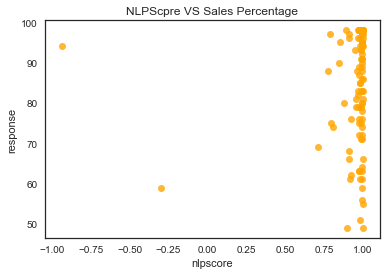

In [1784]:
sns.regplot(nlps.nlpscore, nlp.response, fit_reg=False, color='orange')
plt.title('NLPScpre VS Sales Percentage')
plt.savefig('nlpscore')

In [1117]:
nlps.to_csv('nlp100.csv')

# Dataset Preprocessing

In [1119]:
df1=df.join(imgdata)

In [1131]:
len(df1.title[0].split())

15

In [1135]:
df1['titlecount']=df1.title.apply(lambda x: len(x.split()))

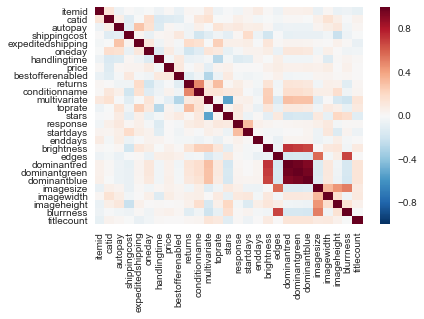

In [1823]:
sns.heatmap(df1.corr())
plt.savefig('ht.jpg')

In [1170]:
df1.conditionname=df1.conditionname.fillna(0)

In [1173]:
df2=df1.drop(['itemid','subtitle','postcode','review0','review1','review2','review3',
              'review4','reviews'], axis=1)

In [1175]:
df3=df2.dropna(axis=0)

In [1183]:
df4=df3.drop(['title','gurl','url','location','starttime','endtime'], axis=1)

In [1355]:
df4.columns

Index(['catid', 'catname', 'autopay', 'country', 'shippingcost',
       'shippingtype', 'expeditedshipping', 'oneday', 'handlingtime', 'price',
       'sellingstate', 'bestofferenabled', 'listingtype', 'returns',
       'conditionname', 'multivariate', 'toprate', 'stars', 'response',
       'startdays', 'enddays', 'brightness', 'edges', 'dominantred',
       'dominantgreen', 'dominantblue', 'imagesize', 'imagewidth',
       'imageheight', 'blurrness', 'titlecount'],
      dtype='object')

In [1356]:
df4=pd.get_dummies(df4, prefix=['country'], columns=['country'])

In [1361]:
df4=pd.get_dummies(df4, prefix=['shippingtype'], columns=['shippingtype'])

In [1364]:
df4=df4.drop('sellingstate', axis=1)

In [1367]:
df4=pd.get_dummies(df4, prefix=['listingtype'], columns=['listingtype'])

In [1376]:
df4.shape

(696, 40)

In [1379]:
ebcat=pd.read_csv('ebaycat1.csv')
ebcat=ebcat.drop('Unnamed: 0', axis=1)

In [1385]:
catdict={}
for i, r in ebcat.iterrows():
    catdict.update(dict([(r[0], r[1])]))

In [1387]:
df4['pcatname']=df4.catid.map(catdict)

In [1426]:
df4.pcatname=df4.pcatname.fillna('giftcards')

In [1428]:
df6=df4

In [1429]:
df4=pd.get_dummies(df4, prefix=['pcatname'], columns=['pcatname'])

In [1437]:
df4=df4.drop(['catid', 'catname'], axis=1)

In [1442]:
df4.to_csv('df4.csv')

# Model Selection and Evalutation

In [1443]:
from sklearn.preprocessing import StandardScaler
dataset=StandardScaler().fit_transform(df4)

In [1445]:
index=df4.columns.get_loc('response')
index

12

In [1446]:
X=np.delete(dataset, index, 1)
y=dataset[:,index]

In [1451]:
import statsmodels.api as sm
model_fit=sm.OLS(y, X).fit()
print(model_fit.summary())
print(model_fit.pvalues)

C:\Users\pengq\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     3.694
Date:                Tue, 15 May 2018   Prob (F-statistic):           4.13e-17
Time:                        01:54:45   Log-Likelihood:                -880.27
No. Observations:                 696   AIC:                             1885.
Df Residuals:                     634   BIC:                             2166.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0126      0.043      0.295      0.7

In [1452]:
model_norm_residuals = model_fit.get_influence().resid_studentized_external
model_leverage = model_fit.get_influence().hat_matrix_diag
model_cooks = model_fit.get_influence().cooks_distance[0]

In [1453]:
model=pd.DataFrame(np.column_stack([model_leverage, model_norm_residuals, model_cooks]), columns=['leverage', 'residuals','cooks'])
model=model.dropna(axis=0)

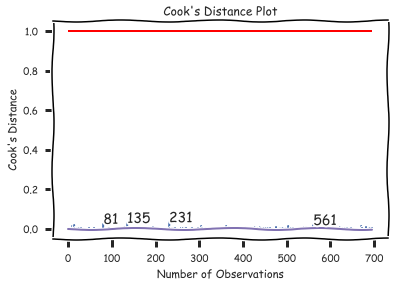

In [1454]:
with plt.xkcd():
    plt.title('Cook\'s Distance Plot')
    plt.xlabel('Number of Observations')
    plt.ylabel('Cook\'s Distance')
    plt.stem(np.arange(len(model.cooks)), model.cooks, markerfmt=",")
    leverage_top_4=model.cooks.sort_values(ascending=False)[:4].index
    for i in leverage_top_4:
        plt.annotate(i, xy=(i,model.cooks[i]))
    plt.hlines(y=4/len(X), xmin=0, xmax=len(X), color='orange')
    plt.hlines(y=1, xmin=0, xmax=len(X), color='red')
    #plt.savefig('ocooks')

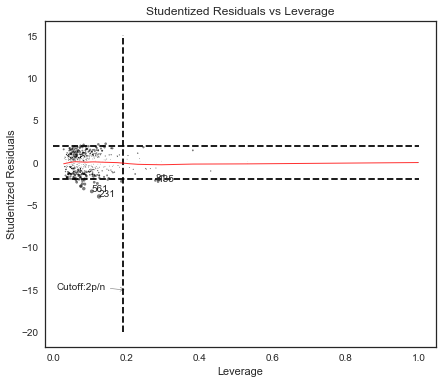

In [1455]:
# Studentized Plot and Leverage 
plot_lm_4 = plt.figure(4, figsize=(7,6))
#plot_lm_4.set_figheight(8)
#plot_lm_4.set_figwidth(12)
area=model.residuals**2
plt.scatter(model.leverage, model.residuals, s=area, alpha=0.5, color='black')
sns.regplot(model.leverage, model.residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_4.axes[0].set_title('Studentized Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Studentized Residuals')

# annotations for leverage topsbb
for i in leverage_top_4:
    #print(model_leverage(i))
    plot_lm_4.axes[0].annotate(i, xy=(model.leverage[i],model.residuals[i]))
#plt.savefig('oresidualplot')
# Take the cutoff at 2p/n
cutoff=2*X.shape[1]/X.shape[0]
plt.vlines(x=cutoff, ymin=-20, ymax=15, linestyle='dashed')
plt.hlines(y=2, xmin=0, xmax=1, linestyle='dashed')
plt.hlines(y=-2, xmin=0, xmax=1, linestyle='dashed')
plt.annotate('Cutoff:2p/n', xy=(0.2, -15), arrowprops=dict(arrowstyle='->'), xytext=(0.01, -15))
plt.savefig('student')


In [1456]:
X_del=np.delete(X, leverage_top_4, 0)
y_del=np.delete(y, leverage_top_4, 0)

In [1457]:
import statsmodels.api as sm
model_fit_del=sm.OLS(y_del, X_del).fit()
print(model_fit_del.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     4.276
Date:                Tue, 15 May 2018   Prob (F-statistic):           2.25e-21
Time:                        01:57:18   Log-Likelihood:                -856.22
No. Observations:                 692   AIC:                             1836.
Df Residuals:                     630   BIC:                             2118.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0026      0.042      0.062      0.9

# ElasticNet 5-Fold CV

In [1847]:
# ElasticNet Regression 5KCV n/2
# R squared for learning dataset
rscore_train_ela_n2=[]
# R squared for Validation dataset
rscore_test_ela_n2=[]
# Mean_squared_error
mse_ecv_n2=[]
# MSE for all the splits used in the cross_validation 
mse_path_ecv_n2=[]
# lambdas selected by cross_validation
lam_elacv_n2=[]
# All the lambdas used in the cross_validation
lams_elacv_n2=[]
# coefficients of lambdas
coef_elacv_n2=[]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
for i in range(5):
    X_train, X_test, y_train, y_test=train_test_split(X_del, y_del, train_size=int(X_del.shape[0]/2))
    elacv=ElasticNetCV(cv=5, l1_ratio=0.5)
    elacv.fit(X_train, y_train)
    y_pred_train=elacv.predict(X_train)
    y_pred_test=elacv.predict(X_test)
    score_train=1-(sum((y_train-y_pred_train)**2)/len(y_train))/(sum((y_del-np.mean(y_del))**2)/len(y_del))
    score_test=1-(sum((y_test-y_pred_test)**2)/len(y_test))/(sum((y_del-np.mean(y_del))**2)/len(y_del))
    mse_elacv=mean_squared_error(y_test, y_pred_test)
    # Append the values to lists
    rscore_train_ela_n2.append(score_train)
    rscore_test_ela_n2.append(score_test)
    mse_ecv_n2.append(mse_elacv)
    lam_elacv_n2.append(elacv.alpha_)
    coef_elacv_n2.append(elacv.coef_)
    mse_path_ecv_n2.append(elacv.mse_path_)
    lams_elacv_n2.append(elacv.alphas_)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



5KCV Lambda: 0.181029
5KCV CV Error: 0.918099


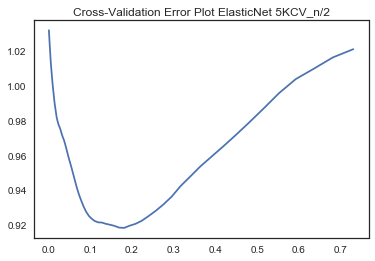

In [1864]:
mean_mse_path_ecv_n2=[np.mean(i) for i in mse_path_ecv_n2[0]]
plt.plot(lams_elacv_n2[0], mean_mse_path_ecv_n2)
print('5KCV Lambda: %f'%lams_elacv_n2[0][np.argmin(mean_mse_path_ecv_n2)])
print('5KCV CV Error: %f'%np.min(mean_mse_path_ecv_n2))
plt.title('Cross-Validation Error Plot ElasticNet 5KCV_n/2')
plt.savefig('cvela')

In [1843]:
coefnames=df4.drop('response', axis=1).columns

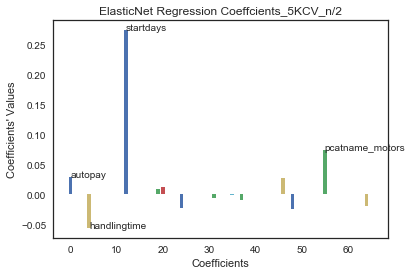

In [1849]:
# Coefficients Graph ElasticNet Regression 5KCV n/2
elacoef_n2=coef_elacv_n2[np.argmin(mse_ecv_n2)]
for i in range(len(elacoef_n2.ravel())):
    plt.bar(i, elacoef_n2.ravel()[i])
plt.title('ElasticNet Regression Coeffcients_5KCV_n/2')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
plt.savefig('oElastic5kcvn2_coef')
elacoefs=pd.DataFrame(np.column_stack([coefnames, elacoef_n2, abs(elacoef_n2)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in elacoefs.index], elacoefs.name, [float(i) for i in elacoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))
plt.savefig('felastic5kcvn2_coef')

# Lasso Regression 5 Fold CV

In [1850]:
#Lasso Regression 5KCVV n2
# R squared for learning dataset
rscore_train_lasso_n2=[]
# R squared for Validation dataset
rscore_test_lasso_n2=[]
# Mean_squared_error
mse_lcv_n2=[]
# MSE for all the splits used in the cross_validation 
mse_path_lcv_n2=[]
# lambdas selected by cross_validation
lam_lassocv_n2=[]
# All the lambdas used in the cross_validation
lams_lassocv_n2=[]
# coefficients of lambdas
coef_lassocv_n2=[]
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
for i in range(5):
    X_train, X_test, y_train, y_test=train_test_split(X_del, y_del, train_size=int(X_del.shape[0]/2))
    lassocv=LassoCV(cv=5, alphas=None)
    lassocv.fit(X_train, y_train)
    y_pred_train=lassocv.predict(X_train)
    y_pred_test=lassocv.predict(X_test)
    score_train=1-(sum((y_train-y_pred_train)**2)/len(y_train))/(sum((y_del-np.mean(y_del))**2)/len(y_del))
    score_test=1-(sum((y_test-y_pred_test)**2)/len(y_test))/(sum((y_del-np.mean(y_del))**2)/len(y_del))
    mse_lassocv=mean_squared_error(y_test, y_pred_test)
    # Append the values to lists
    rscore_train_lasso_n2.append(score_train)
    rscore_test_lasso_n2.append(score_test)
    mse_lcv_n2.append(mse_lassocv)
    lam_lassocv_n2.append(lassocv.alpha_)
    coef_lassocv_n2.append(lassocv.coef_)
    mse_path_lcv_n2.append(lassocv.mse_path_)
    lams_lassocv_n2.append(lassocv.alphas_)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



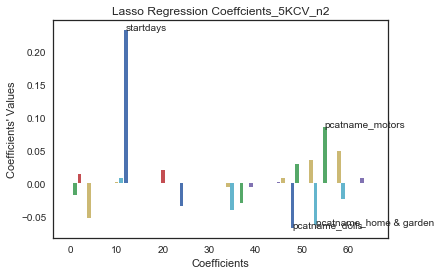

In [1851]:
lassocoef_n2=coef_lassocv_n2[np.argmin(mse_lcv_n2)]
for i in range(len(lassocoef_n2.ravel())):
    plt.bar(i, lassocoef_n2.ravel()[i])
plt.title('Lasso Regression Coeffcients_5KCV_n2')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
plt.savefig('oLasso5kcvn2_coef')
lassocoefs=pd.DataFrame(np.column_stack([coefnames, lassocoef_n2, abs(lassocoef_n2)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in lassocoefs.index], lassocoefs.name, [float(i) for i in lassocoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))
plt.savefig('flasso5kcvn2_coef')

5KCV Lambda: 0.062056
5KCV CV Error: 0.794761


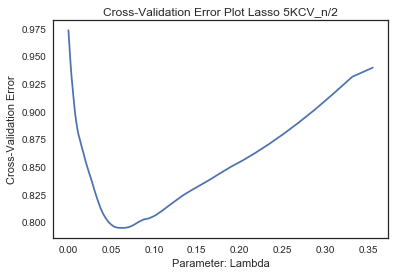

In [1862]:
#Cross validation Plot
mean_mse_path_lcv_n2=[np.mean(i) for i in mse_path_lcv_n2[0]]
plt.plot(lams_lassocv_n2[0], mean_mse_path_lcv_n2)
plt.title('Cross-Validation Error Plot Lasso 5KCV_n/2')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print('5KCV Lambda: %f'%lams_lassocv_n2[0][np.argmin(mean_mse_path_lcv_n2)])
print('5KCV CV Error: %f'%np.min(mean_mse_path_lcv_n2))
plt.savefig('cvlasso')

# Ridge Regression 5Fold CV

In [1854]:
# R squared for learning dataset
rscore_train_ridge_n2=[]
# R squared for Validation dataset
rscore_test_ridge_n2=[]
# Mean_squared_error
mse_rcv_n2=[]
# MSE for all the splits used in the cross_validation
mse_path_rcv_n2=[]
# Lambda selectd by the cross_validation
lam_ridgecv_n2=[]
# All the lambdas used in the cross_validation
lams_ridgecv_n2=[]
# coefficients of lambdas
coef_ridgecv_n2=[]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
for i in range(5):
    X_train, X_test, y_train, y_test=train_test_split(X_del, y_del, train_size=int(X_del.shape[0]/2))
    ridgecv=ElasticNetCV(cv=5, l1_ratio=0.01, alphas=None)
    ridgecv.fit(X_train, y_train)
    y_pred_train=ridgecv.predict(X_train)
    y_pred_test=ridgecv.predict(X_test)
    score_train=1-(sum((y_train-y_pred_train)**2)/len(y_train))/(sum((y_del-np.mean(y_del))**2)/len(y_del))
    score_test=1-(sum((y_test-y_pred_test)**2)/len(y_test))/(sum((y_del-np.mean(y_del))**2)/len(y_del))
    mse_ridgecv=mean_squared_error(y_test, y_pred_test)
    # Append the values to lists
    rscore_train_ridge_n2.append(score_train)
    rscore_test_ridge_n2.append(score_test)
    mse_rcv_n2.append(mse_ridgecv)
    lam_ridgecv_n2.append(ridgecv.alpha_)
    coef_ridgecv_n2.append(ridgecv.coef_)
    mse_path_rcv_n2.append(ridgecv.mse_path_)
    lams_ridgecv_n2.append(ridgecv.alphas_)

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



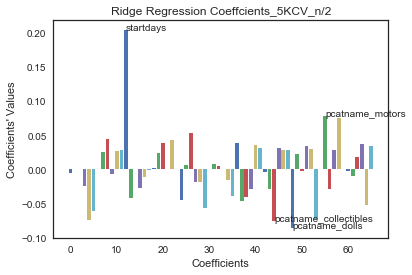

In [1855]:
# Coefficients Graph Ridge Regression LOOCV n/2
ridgecoef=coef_ridgecv_n2[np.argmin(mse_rcv_n2)]
for i in range(len(ridgecoef.ravel())):
    plt.bar(i, ridgecoef.ravel()[i])
plt.title('Ridge Regression Coeffcients_5KCV_n/2')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
ridgecoefs=pd.DataFrame(np.column_stack([coefnames, ridgecoef, abs(ridgecoef)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in ridgecoefs.index], ridgecoefs.name, [float(i) for i in ridgecoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))

plt.savefig('fridge5kcvn2_coef')

5KCV Lambda:0.384907
5KCV CV Error:0.826143


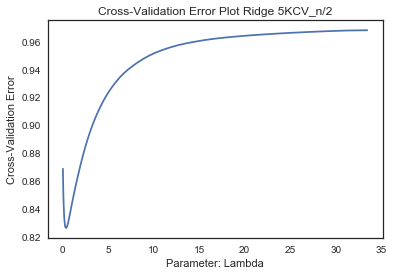

In [1867]:
#Cross validation Plot
mean_mse_path_rcv_n2=[np.mean(i) for i in mse_path_rcv_n2[0]]
plt.plot(lams_ridgecv_n2[0], mean_mse_path_rcv_n2)
plt.title('Cross-Validation Error Plot Ridge 5KCV_n/2')
plt.xlabel('Parameter: Lambda')
plt.ylabel('Cross-Validation Error')
print('5KCV Lambda:%f'%lams_ridgecv_n2[0][np.argmin(mean_mse_path_rcv_n2)])
print('5KCV CV Error:%f'%np.min(mean_mse_path_rcv_n2))
plt.savefig('cvridge')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



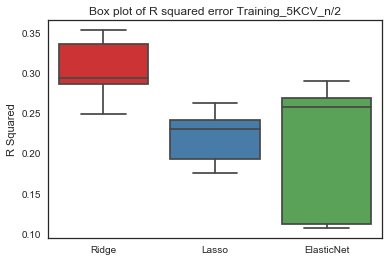

In [1856]:
# Boxplot of training R squared error with 2p
m=pd.DataFrame(np.column_stack([rscore_train_ridge_n2, rscore_train_lasso_n2, rscore_train_ela_n2]), columns=['Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=m, orient='v', palette='Set1')
plt.title('Box plot of R squared error Training_5KCV_n/2')
plt.ylabel('R Squared')
plt.savefig('ftrain5kcvn2_box3')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



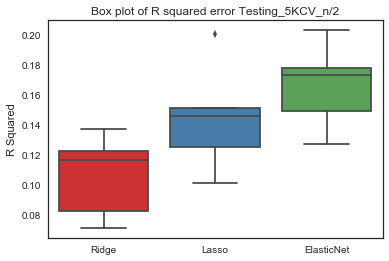

In [1857]:
# Boxplot of training R squared error with 2p
m=pd.DataFrame(np.column_stack([rscore_test_ridge_n2, rscore_test_lasso_n2, rscore_test_ela_n2]), columns=['Ridge', 'Lasso', 'ElasticNet'])
sns.boxplot(data=m, orient='v', palette='Set1')
plt.title('Box plot of R squared error Testing_5KCV_n/2')
plt.ylabel('R Squared')
plt.savefig('ftest5kcvn2_box3')

# Least Square Regression 5Fold CV

In [1858]:
# Least Square 2p 5KCV n2
rscore_train_lscv_n2=[]
# R squared for Validation dataset
rscore_test_lscv_n2=[]
# Mean_squared_error
mse_lscv_n2=[]
# coefficients of lambdas
coef_lscv_n2=[]
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
for i in range(5):
    X_train, X_test, y_train, y_test=train_test_split(X_del, y_del, train_size=int(X_del.shape[0]/2))
    kf=KFold(n_splits=5)
    rscore_train=[]
    rscore_test=[]
    mse=[]
    coef=[]
    for hold_index, out_index in kf.split(X_train):
        X_hold, X_out=X_train[hold_index], X_test[out_index]
        y_hold, y_out=y_train[hold_index], y_test[out_index]
        linear=LinearRegression()
        linear.fit(X_hold, y_hold)
        y_pred_train=linear.predict(X_train)
        y_pred_test=linear.predict(X_test)
        score_train=1-(sum((y_train-y_pred_train)**2)/len(y_train))/(sum((y_del-np.mean(y_del))**2)/len(y_del))
        score_test=1-(sum((y_test-y_pred_test)**2)/len(y_test))/(sum((y_del-np.mean(y_del))**2)/len(y_del))
        mse_linear=mean_squared_error(y_test, y_pred_test)
    # Append the values to lists
        rscore_train.append(score_train)
        rscore_test.append(score_test)
        mse.append(mse_linear)
        coef.append(linear.coef_)
    rscore_train_lscv_n2.append(rscore_train[np.argmin(mse)])
    rscore_test_lscv_n2.append(rscore_test[np.argmin(mse)])
    mse_lscv_n2.append(np.min(mse))
    coef_lscv_n2.append(coef[np.argmin(mse)])

C:\Users\pengq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



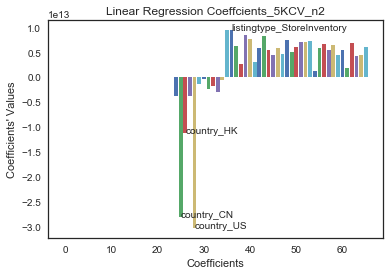

In [1859]:
# Coefficients Graph for least Square Regression 5KCV n/2
for i in range(len(coef_lscv_n2[np.argmin(mse_lscv_n2)])):
    plt.bar(i, coef_lscv_n2[np.argmin(mse_lscv_n2)][i])
plt.title('Linear Regression Coeffcients_5KCV_n2')
plt.ylabel('Coefficients\' Values')
plt.xlabel('Coefficients')
lscoef_n2=coef_lscv_n2[np.argmin(mse_lscv_n2)]
lscoefs=pd.DataFrame(np.column_stack([coefnames, lscoef_n2, abs(lscoef_n2)]), columns=['name', 'coefs', 'abs']).sort_values(by='abs', ascending=False)[:4]
final=pd.DataFrame(np.column_stack([[float(i) for i in lscoefs.index], lscoefs.name, [float(i) for i in lscoefs.coefs]]), columns=['a', 'b', 'c'])
for i in range(4):
    plt.annotate(final.b[i], xy=(int(final.a[i]), final.c[i]))

plt.savefig('fls5kcvn2_coef')

# Additional Data Visualization (For PPT purpose)

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

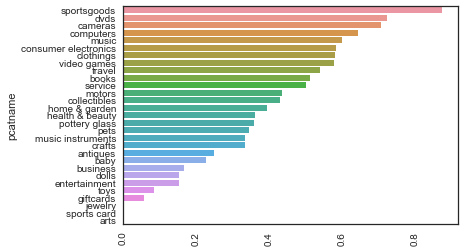

In [1682]:
sns.barplot(y=df6.groupby('pcatname').mean().expeditedshipping.sort_values(ascending=False).index, x=df6.groupby('pcatname').mean().expeditedshipping.sort_values(ascending=False).values)
plt.xticks(rotation=90)

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

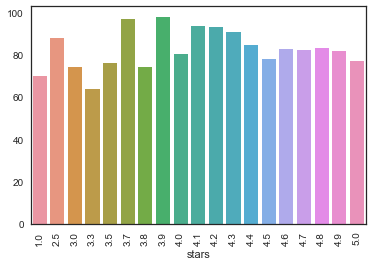

In [1681]:
sns.barplot(x=df6.groupby('stars').mean().response.sort_values(ascending=False).index, y=df6.groupby('stars').mean().response.sort_values(ascending=False).values)
plt.xticks(rotation=90)

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



(array([0., 1., 2., 3., 4., 5., 6.]), <a list of 7 Text xticklabel objects>)

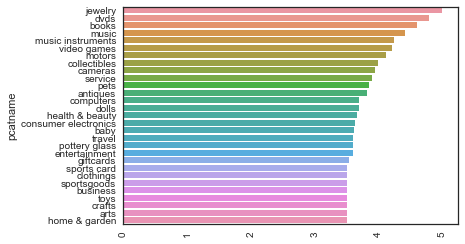

In [1679]:
sns.barplot(y=df6.groupby('pcatname').mean().stars.sort_values(ascending=False).index, x=df6.groupby('pcatname').mean().stars.sort_values(ascending=False).values)
plt.xticks(rotation=90)

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text xticklabel objects>)

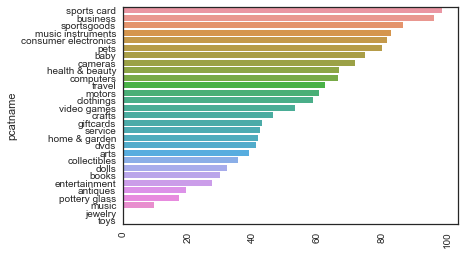

In [1677]:
sns.barplot(y=df6.groupby('pcatname').mean().brightness.sort_values(ascending=False).index, x=df6.groupby('pcatname').mean().brightness.sort_values(ascending=False).values)
plt.xticks(rotation=90)

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



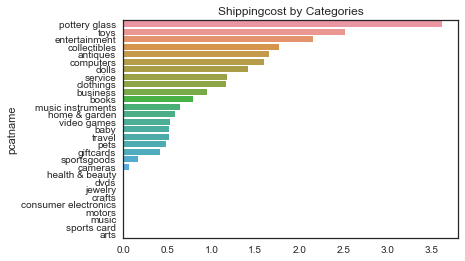

In [1767]:
sns.barplot(y=df6.groupby('pcatname').mean().shippingcost.sort_values(ascending=False).index, x=df6.groupby('pcatname').mean().shippingcost.sort_values(ascending=False).values)
plt.title('Shippingcost by Categories')
plt.savefig('shipipngcost.jpg')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



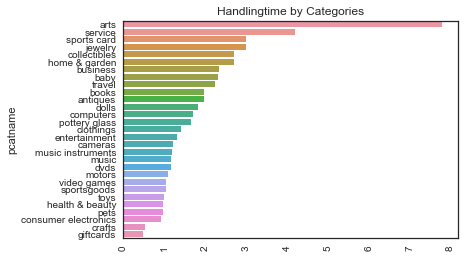

In [1766]:
sns.barplot(y=df6.groupby('pcatname').mean().handlingtime.sort_values(ascending=False).index, x=df6.groupby('pcatname').mean().handlingtime.sort_values(ascending=False).values)
plt.xticks(rotation=90)
plt.title('Handlingtime by Categories')
plt.savefig('handlingtime.jpg')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text xticklabel objects>)

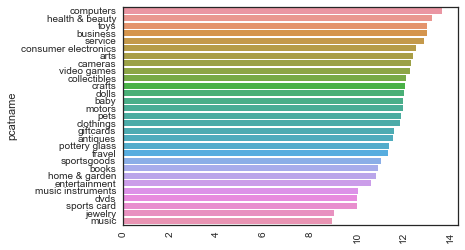

In [1673]:
sns.barplot(y=df6.groupby('pcatname').mean().titlecount.sort_values(ascending=False).index, x=df6.groupby('pcatname').mean().titlecount.sort_values(ascending=False).values)
plt.xticks(rotation=90)

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <a list of 10 Text xticklabel objects>)

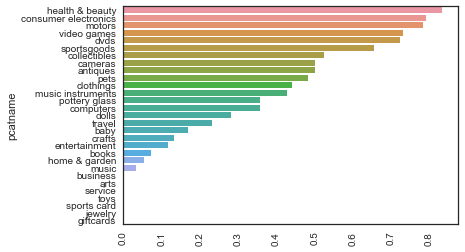

In [1672]:
sns.barplot(y=df6.groupby('pcatname').mean().toprate.sort_values(ascending=False).index, x=df6.groupby('pcatname').mean().toprate.sort_values(ascending=False).values)
plt.xticks(rotation=90)

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



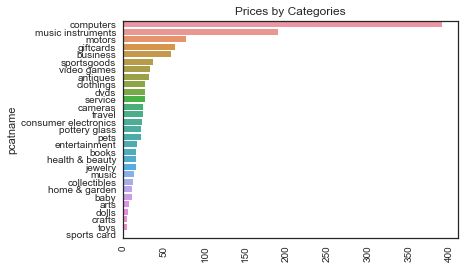

In [1771]:
sns.barplot(y=df6.groupby('pcatname').mean().price.sort_values(ascending=False).index, x=df6.groupby('pcatname').mean().price.sort_values(ascending=False).values)
plt.xticks(rotation=90)
plt.title('Prices by Categories')
plt.savefig('price.jpg')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



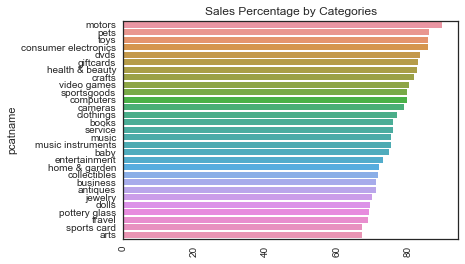

In [1770]:
sns.barplot(y=df6.groupby('pcatname').mean().response.sort_values(ascending=False).index, x=df6.groupby('pcatname').mean().response.sort_values(ascending=False).values)
plt.xticks(rotation=90)
plt.title('Sales Percentage by Categories')
plt.savefig('Salepercent.jpg')

In [1693]:
text=' '.join(list(df4.columns))
text

'autopay shippingcost expeditedshipping oneday handlingtime price bestofferenabled returns conditionname multivariate toprate stars response startdays enddays brightness edges dominantred dominantgreen dominantblue imagesize imagewidth imageheight blurrness titlecount country_CA country_CN country_HK country_TH country_US shippingtype_Calculated shippingtype_CalculatedDomesticFlatInternational shippingtype_Flat shippingtype_FlatDomesticCalculatedInternational shippingtype_Free shippingtype_FreePickup listingtype_FixedPrice listingtype_StoreInventory pcatname_antiques pcatname_arts pcatname_baby pcatname_books pcatname_business pcatname_cameras pcatname_clothings pcatname_collectibles pcatname_computers pcatname_consumer electronics pcatname_crafts pcatname_dolls pcatname_dvds pcatname_entertainment pcatname_giftcards pcatname_health & beauty pcatname_home & garden pcatname_jewelry pcatname_motors pcatname_music pcatname_music instruments pcatname_pets pcatname_pottery glass pcatname_se

In [1707]:
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image 
d = path.dirname('C:\\Users\\pengq\\AnacondaProjects\\Dataincubator\\')
#tet = open(path.join(d, 'names.txt')).read()
#tet

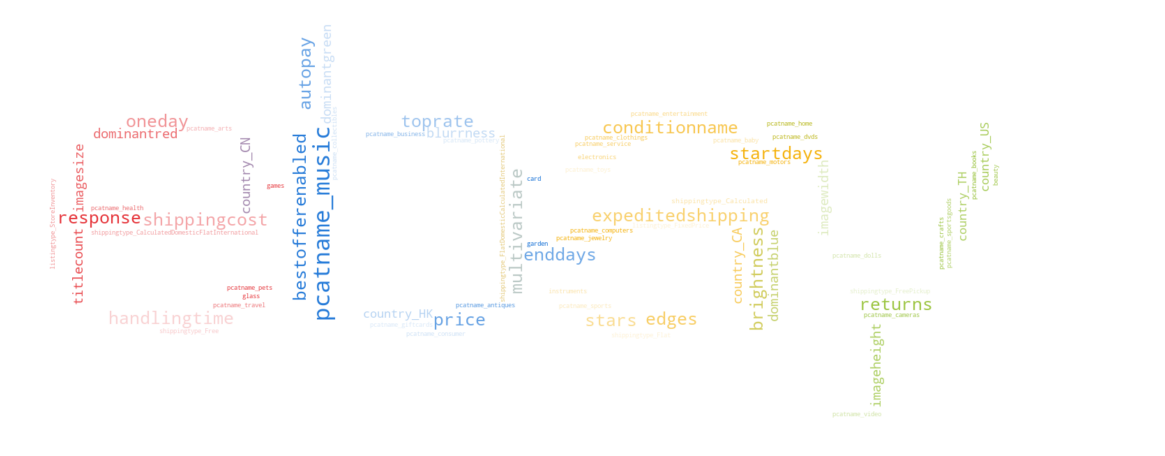

In [1717]:
ebay_mask = np.array(Image.open(path.join(d, "eBay.jpg")))
image_colors = ImageColorGenerator(ebay_mask)
stopwords = set(STOPWORDS)
#stopwords.add("said")
wc = WordCloud(background_color="white", max_words=2000, mask=ebay_mask, stopwords=stopwords,
              width=1600, height=800)
wc.generate(text)
#wc.to_file(path.join(d, "house.png"))plt.figure(figsize=(12,12))
plt.figure(figsize=(20,20))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.savefig('ebaywc.jpg')

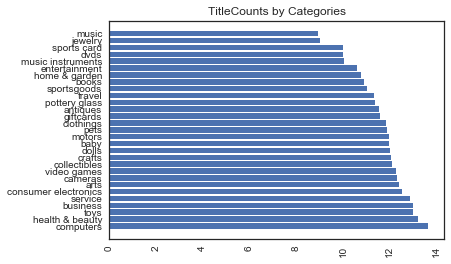

In [1822]:
#sns.barplot(y=df6.groupby('pcatname').mean().titlecount.sort_values(ascending=False).index, x=df6.groupby('pcatname').mean().titlecount.sort_values(ascending=False).values)
plt.barh(df6.groupby('pcatname').mean().titlecount.sort_values(ascending=False).index, df6.groupby('pcatname').mean().titlecount.sort_values(ascending=False).values)
plt.xticks(rotation=90)
plt.title('TitleCounts by Categories')
plt.savefig('tc.jpg')

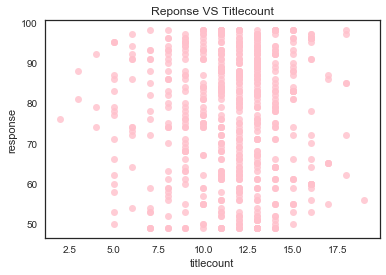

In [1818]:
sns.regplot(df4.titlecount, df4.response, fit_reg=False, color='')
plt.title('Reponse VS Titlecount')
plt.savefig('titlecount.jpg')

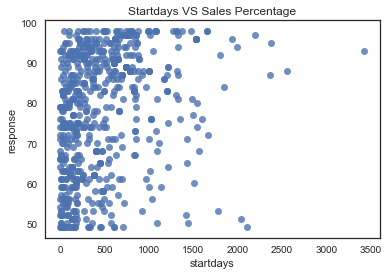

In [1810]:
sns.regplot(df6.startdays, df6.response, fit_reg=False)
plt.title('Startdays VS Sales Percentage')
plt.savefig('startdays.jpg')

C:\Users\pengq\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



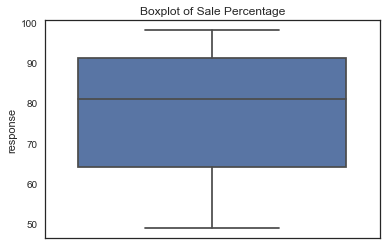

In [1768]:
sns.boxplot(df4.response, orient='v')
plt.title('Boxplot of Sale Percentage')
plt.savefig('boxplot.jpg')

C:\Users\pengq\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



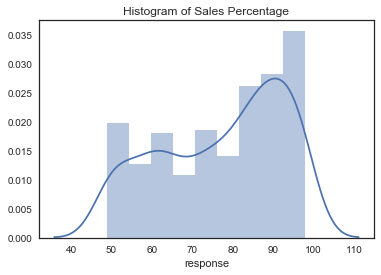

In [1734]:
sns.distplot(df4.response)
plt.title('Histogram of Sales Percentage')
plt.savefig('histresponse.jpg')

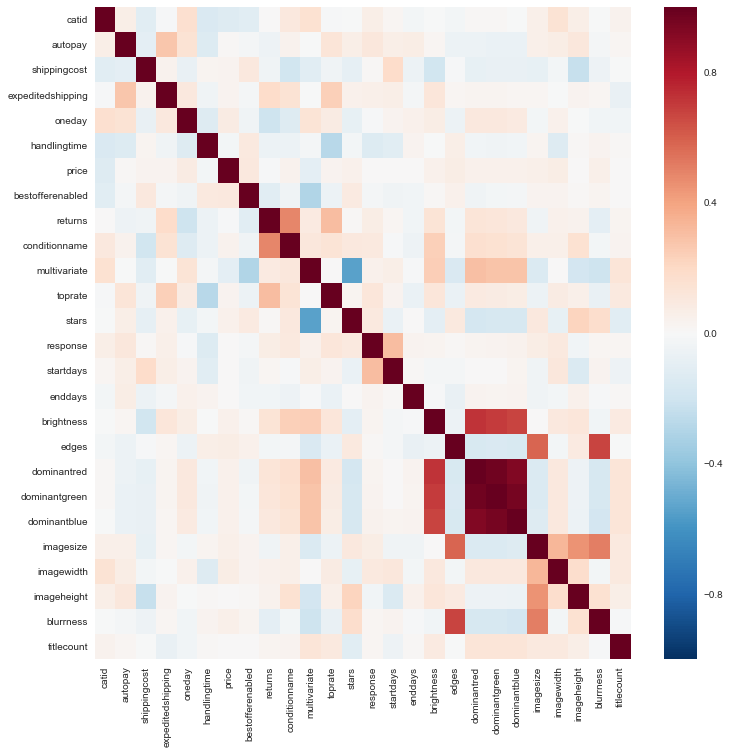

In [1832]:
plt.figure(figsize=(12,12))
sns.heatmap(df3.corr())
plt.savefig('heatmap.jpg')